# Task1: Trittple Integration Using Montecarlos Simulation

This task will examine the error between the integration caulcated by Monte Carlos Simulation and theoritical value. For this, this task uses the following tripple integration whose theortical value is 85.34.


$$\int_{{0}}^{{2}} \int_{{0}}^{{\sqrt{z}}} \int_{{0}}^{{4}} z(x^2 + y^2) \, dz \, dy \, dx$$

### 1.1 Monte Carlos simulation

In [2]:
# Define the function to integrate
def f(x, y, z):
    return z * (x**2 + y**2)

# Define the limits of integration
x_min, x_max = 0, 2
z_min, z_max = 0, 4  # Assuming z_max = x_max^2 for simplicity

# Number of points along each dimension
N = 150

# Generate equally spaced points along each dimension
x_values = [x_min + (x_max - x_min) * i / (N - 1) for i in range(N)]
y_values = [0 + (z_max**0.5 - 0) * i / (N - 1) for i in range(N)]  # Assuming y_max = sqrt(z_max)
z_values = [z_min + (z_max - z_min) * i / (N - 1) for i in range(N)]

# Initialize sum
sum_values = 0

# Iterate over all combinations of x, y, z
for x in x_values:
    for y in y_values:
        for z in z_values:
            # Add the value of f at the point to the sum
            sum_values += f(x, y, z)

# Compute the average value of f
avg_value = sum_values / N**3  # We have N^3 points in total

# Compute the volume of the integration region
volume = (x_max - x_min) * (z_max**0.5 - 0) * (z_max - z_min)

# The integral is the average value times the volume
integral = avg_value * volume

print(integral)

85.61968680089184


### 1.2 Precision Check 

In [3]:
# Theoretical value
theoretical_value = 85.34

# Monte Carlo estimate
monte_carlo_estimate = integral  # This is the result of  Monte Carlo simulation

# Compute the absolute difference
absolute_difference = abs(monte_carlo_estimate - theoretical_value)

# Compute the relative error
relative_error = absolute_difference / theoretical_value

print("Relative error:", relative_error)

Relative error: 0.003277323657040521


### 1.3 Relation between run time and precision

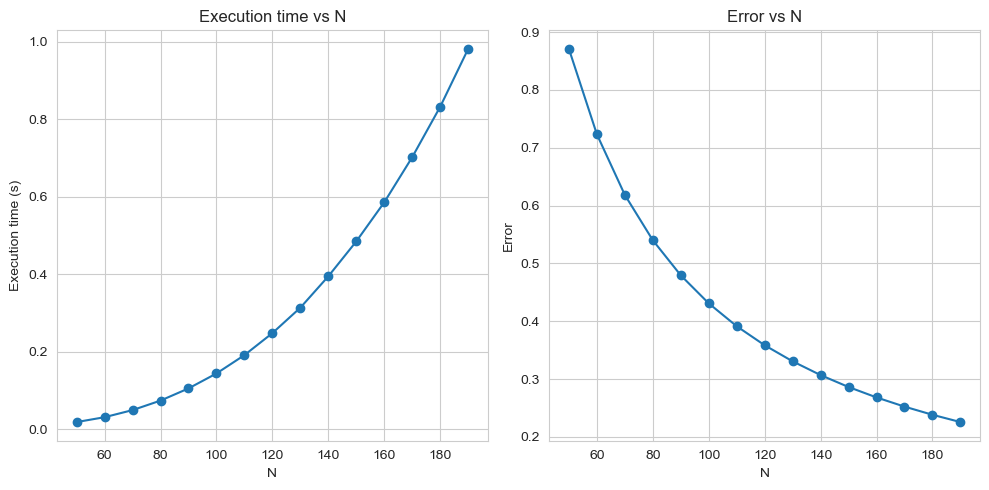

In [4]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
theoretical_integral = 85.33333333333333
# Lists to store the results
N_values = []
execution_times = []
integral_values = []
errors = []

# Iterate over different N values
for N in range(50, 200, 10):
    # Start the timer
    start_time = time.time()

    # Generate equally spaced points along each dimension
    x_values = [x_min + (x_max - x_min) * i / (N - 1) for i in range(N)]
    y_values = [0 + (z_max**0.5 - 0) * i / (N - 1) for i in range(N)]  # Assuming y_max = sqrt(z_max)
    z_values = [z_min + (z_max - z_min) * i / (N - 1) for i in range(N)]

    # Initialize sum
    sum_values = 0

    # Iterate over all combinations of x, y, z
    for x in x_values:
        for y in y_values:
            for z in z_values:
                # Add the value of f at the point to the sum
                sum_values += f(x, y, z)

    # Compute the average value of f
    avg_value = sum_values / N**3  # We have N^3 points in total

    # Compute the volume of the integration region
    volume = (x_max - x_min) * (z_max**0.5 - 0) * (z_max - z_min)

    # The integral is the average value times the volume
    integral = avg_value * volume

    # Compute the error
    error = abs(integral - theoretical_integral)

    # Stop the timer
    end_time = time.time()

    # Compute the execution time
    execution_time = end_time - start_time

    # Store the results
    N_values.append(N)
    execution_times.append(execution_time)
    integral_values.append(integral)
    errors.append(error)
#plot style
sns.set_style("whitegrid")
# Plot the execution times
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(N_values, execution_times, marker='o')
plt.xlabel('N')
plt.ylabel('Execution time (s)')
plt.title('Execution time vs N')

# Plot the errors
plt.subplot(1, 2, 2)
plt.plot(N_values, errors, marker='o')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Error vs N')
plt.tight_layout()
plt.show()

Except few exceptions, Executed time to run simulated integral goes up as N goes up. In contary, the error between between theortical integral and monto_carlos_estimated_integral goes down when N goes up. The implication of this findings is: precision comes up with more run time. 

In [5]:
!jupyter nbconvert --to html task1.ipynb

[NbConvertApp] Converting notebook task1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 342979 bytes to task1.html
